# AneRBC-II Full CBC Clinical Data Analysis

This notebook provides comprehensive analysis and visualization of the Complete Blood Count (CBC) data extracted from AneRBC-II dataset.

**Dataset:** AneRBC_II_Full_Clinical_Data.csv  
**Total Records:** 1,000 (500 Anemic + 500 Healthy)  
**Parameters Analyzed:** WBC, RBC, HGB, HCT, MCV, MCH, MCHC, PLT, MPV, RDW-CV

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

Matplotlib is building the font cache; this may take a moment.


✓ Libraries imported successfully


## 2. Load CBC Data

In [2]:
# Load the CBC data
csv_path = 'transformedDataset/AneRBC_II_Full_Clinical_Data.csv'
df = pd.read_csv(csv_path)

print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {len(df)}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (1000, 23)
Total Records: 1000

First few rows:


,File_Name,Cohort,WBC,WBC_abnormal,RBC,RBC_abnormal,HGB,HGB_abnormal,HCT,HCT_abnormal,...,MCH_abnormal,MCHC,MCHC_abnormal,PLT,PLT_abnormal,MPV,MPV_abnormal,RDW_CV,RDW_CV_abnormal,Anemia_Category
0,001_a.txt,Anemic,8.49,0,4.37,0,10.1,1,29.9,1,...,1,33.8,0,376.0,0,11.2,1,NaN,0,1
1,002_a.txt,Anemic,9.16,0,4.94,0,12.3,0,35.6,0,...,1,34.6,0,232.0,0,10.1,0,NaN,0,1
2,003_a.txt,Anemic,21.29,1,4.46,1,10.8,1,32.9,1,...,0,32.8,0,501.0,1,8.0,0,14.9,1,1
3,004_a.txt,Anemic,1.95,1,2.10,1,5.9,1,17.5,1,...,0,33.7,0,106.0,1,NaN,0,21.2,1,2
4,005_a.txt,Anemic,11.87,0,4.85,0,7.7,1,27.9,0,...,1,27.6,1,803.0,1,NaN,0,NaN,0,1


## 3. Data Overview & Summary Statistics

In [4]:
# Define CBC parameters
cbc_params = ['WBC', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'MPV', 'RDW_CV']

# Summary statistics for all CBC parameters
print("Summary Statistics for CBC Parameters:")
print("=" * 70)
df[cbc_params].describe().T

Summary Statistics for CBC Parameters:


,count,mean,std,min,25%,50%,75%,max
WBC,1000.0,10.189390,23.317115,0.26,6.070,8.19,10.920,515.0
RBC,999.0,4.771231,1.394451,0.78,4.165,4.76,5.360,16.5
HGB,999.0,10.636356,3.231465,1.48,8.550,10.90,12.950,20.6
HCT,999.0,33.817477,9.483167,4.80,28.850,34.30,39.900,87.8
MCV,1000.0,80.565131,160.259683,13.80,63.900,73.70,83.225,3646.0
MCH,1000.0,23.612350,6.345007,11.70,19.275,24.10,27.625,88.0
MCHC,991.0,31.917154,9.002770,15.10,29.800,31.80,33.500,260.0
PLT,996.0,331.252942,187.820317,5.64,230.000,304.00,405.000,1976.0
MPV,697.0,14.017116,36.713938,7.17,10.200,10.90,11.700,728.0
RDW_CV,429.0,16.311072,4.756265,11.40,13.000,14.40,18.600,39.3


In [5]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 70)
missing_data = df[cbc_params].isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
        Missing Count  Percentage
RBC                 1         0.1
HGB                 1         0.1
HCT                 1         0.1
MCHC                9         0.9
PLT                 4         0.4
MPV               303        30.3
RDW_CV            571        57.1


## 4. Cohort and Anemia Category Distribution

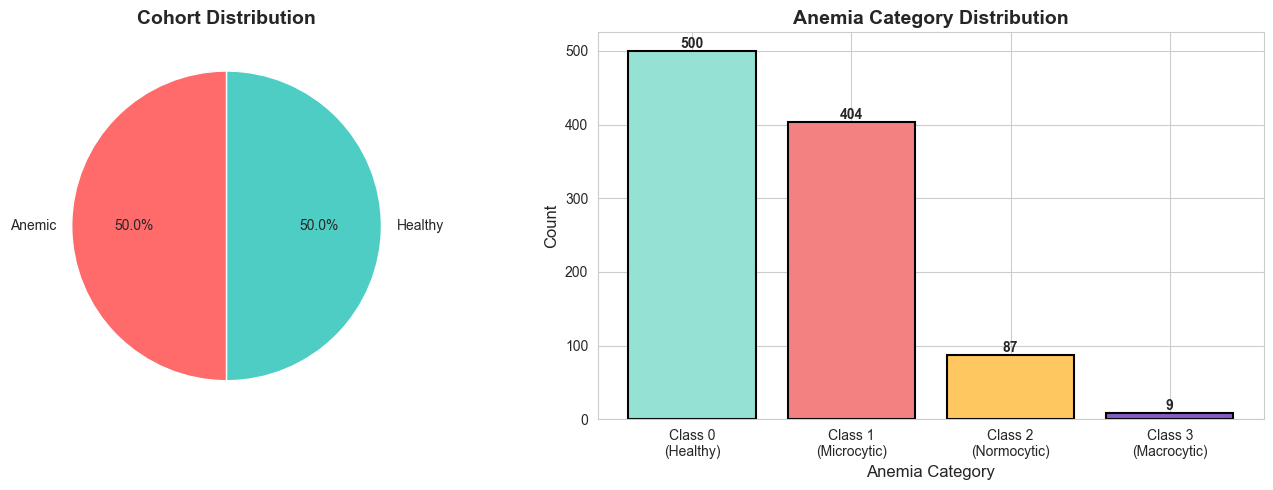


Cohort Counts:
Cohort
Anemic     500
Healthy    500
Name: count, dtype: int64

Anemia Category Counts:
Anemia_Category
0    500
1    404
2     87
3      9
Name: count, dtype: int64


In [6]:
# Cohort distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cohort distribution
cohort_counts = df['Cohort'].value_counts()
axes[0].pie(cohort_counts.values, labels=cohort_counts.index, autopct='%1.1f%%',
            colors=['#ff6b6b', '#4ecdc4'], startangle=90)
axes[0].set_title('Cohort Distribution', fontsize=14, fontweight='bold')

# Anemia Category distribution
category_names = {
    0: 'Class 0\n(Healthy)',
    1: 'Class 1\n(Microcytic)',
    2: 'Class 2\n(Normocytic)',
    3: 'Class 3\n(Macrocytic)'
}
anemia_counts = df['Anemia_Category'].value_counts().sort_index()
colors = ['#95e1d3', '#f38181', '#ffc75f', '#845ec2']
bars = axes[1].bar([category_names[x] for x in anemia_counts.index], 
                    anemia_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_title('Anemia Category Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xlabel('Anemia Category', fontsize=12)

# Add count labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nCohort Counts:\n{cohort_counts}")
print(f"\nAnemia Category Counts:\n{anemia_counts}")

## 9. Correlation Analysis

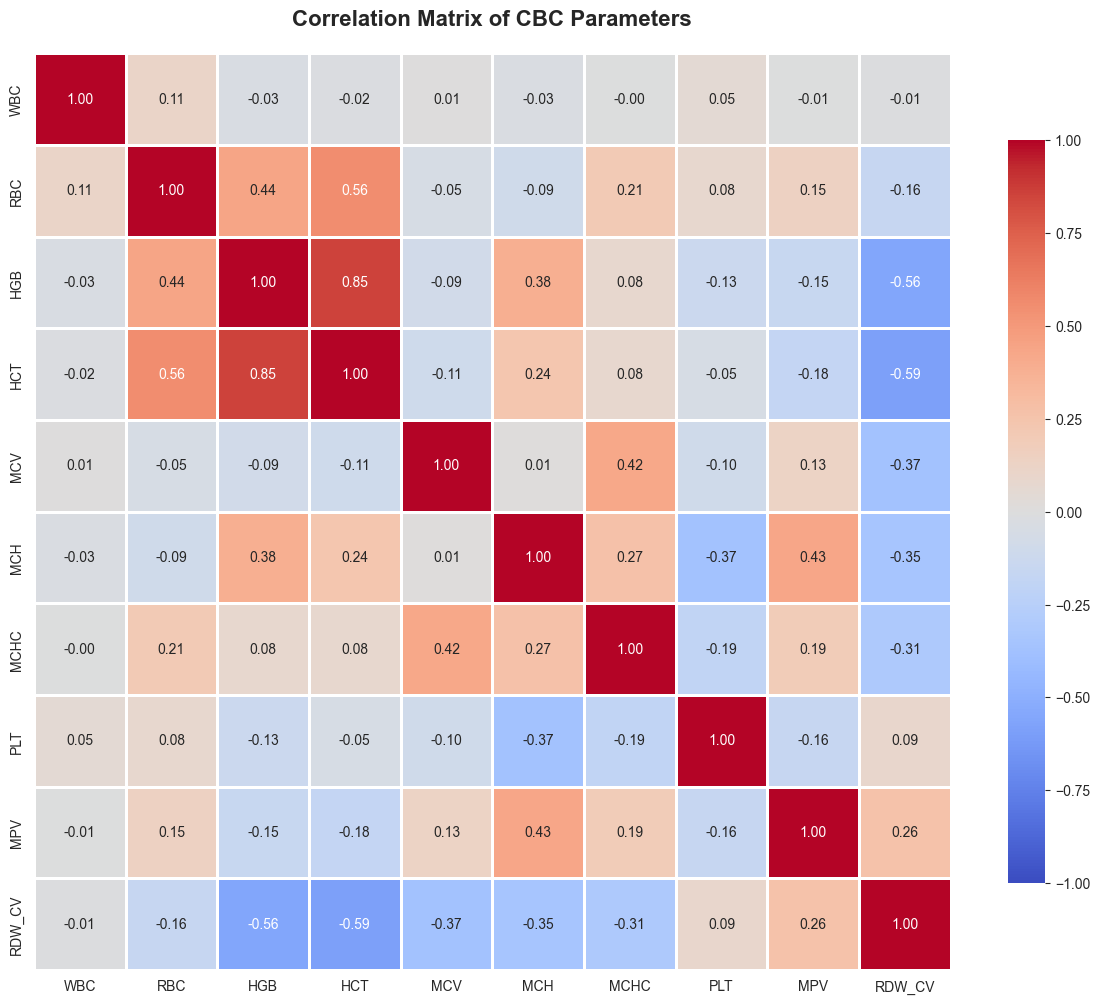


Strongest Positive Correlations:
HCT <-> HGB: 0.853


In [11]:
# Correlation matrix for all CBC parameters
correlation_matrix = df[cbc_params].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Matrix of CBC Parameters', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find strongest correlations
print("\nStrongest Positive Correlations:")
print("=" * 70)
# Get upper triangle of correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
masked_corr = correlation_matrix.mask(mask)
# Get correlations > 0.7
strong_pos = []
for col in masked_corr.columns:
    for idx in masked_corr.index:
        val = masked_corr.loc[idx, col]
        if pd.notna(val) and val > 0.7:
            strong_pos.append((idx, col, val))
strong_pos.sort(key=lambda x: x[2], reverse=True)
for param1, param2, corr in strong_pos[:5]:
    print(f"{param1} <-> {param2}: {corr:.3f}")

## 14. Summary Report

In [16]:
print("=" * 80)
print(" " * 20 + "COMPREHENSIVE CBC DATA ANALYSIS SUMMARY")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print("-" * 80)
print(f"   Total Records: {len(df)}")
print(f"   Anemic Individuals: {len(df[df['Cohort'] == 'Anemic'])}")
print(f"   Healthy Individuals: {len(df[df['Cohort'] == 'Healthy'])}")

print("\n2. ANEMIA CLASSIFICATION:")
print("-" * 80)
for cat_id, cat_name in category_labels.items():
    count = len(df[df['Anemia_Category'] == cat_id])
    pct = (count / len(df)) * 100
    print(f"   {cat_name:20} : {count:4} ({pct:5.1f}%)")

print("\n3. KEY FINDINGS:")
print("-" * 80)
print(f"   Average HGB (Anemic):  {df[df['Cohort'] == 'Anemic']['HGB'].mean():.2f} g/dL")
print(f"   Average HGB (Healthy): {df[df['Cohort'] == 'Healthy']['HGB'].mean():.2f} g/dL")
print(f"   Average MCV (Anemic):  {df[df['Cohort'] == 'Anemic']['MCV'].mean():.2f} fL")
print(f"   Average MCV (Healthy): {df[df['Cohort'] == 'Healthy']['MCV'].mean():.2f} fL")

print("\n4. DATA QUALITY:")
print("-" * 80)
missing_summary = df[cbc_params].isnull().sum()
total_missing = missing_summary.sum()
print(f"   Total Missing Values: {total_missing}")
if total_missing > 0:
    for param in cbc_params:
        if missing_summary[param] > 0:
            print(f"   {param}: {missing_summary[param]} missing")

print("\n5. ABNORMAL FLAGS:")
print("-" * 80)
total_abnormal_anemic = df[df['Cohort'] == 'Anemic'][[col for col in df.columns if col.endswith('_abnormal')]].sum().sum()
total_abnormal_healthy = df[df['Cohort'] == 'Healthy'][[col for col in df.columns if col.endswith('_abnormal')]].sum().sum()
print(f"   Total Abnormal Flags (Anemic):  {int(total_abnormal_anemic)}")
print(f"   Total Abnormal Flags (Healthy): {int(total_abnormal_healthy)}")
print(f"   Average per Anemic patient:     {total_abnormal_anemic / 500:.2f}")
print(f"   Average per Healthy individual: {total_abnormal_healthy / 500:.2f}")

print("\n" + "=" * 80)
print("Analysis completed successfully!")
print("=" * 80)

                    COMPREHENSIVE CBC DATA ANALYSIS SUMMARY

1. DATASET OVERVIEW:
--------------------------------------------------------------------------------
   Total Records: 1000
   Anemic Individuals: 500
   Healthy Individuals: 500

2. ANEMIA CLASSIFICATION:
--------------------------------------------------------------------------------
   Healthy              :  500 ( 50.0%)
   Microcytic           :  404 ( 40.4%)
   Normocytic           :   87 (  8.7%)
   Macrocytic           :    9 (  0.9%)

3. KEY FINDINGS:
--------------------------------------------------------------------------------
   Average HGB (Anemic):  10.10 g/dL
   Average HGB (Healthy): 11.17 g/dL
   Average MCV (Anemic):  70.08 fL
   Average MCV (Healthy): 91.05 fL

4. DATA QUALITY:
--------------------------------------------------------------------------------
   Total Missing Values: 890
   RBC: 1 missing
   HGB: 1 missing
   HCT: 1 missing
   MCHC: 9 missing
   PLT: 4 missing
   MPV: 303 missing
   RDW_CV